In [1]:
geno <-read.table("Hetero_realigned_cov10_filtered3.raw", row.names=1, header=T)
pheno <- read.csv("2017heteroPheno.csv", header=T)
train_id<-read.csv("idtrain")
x <- as.matrix(geno)-1  

In [2]:
library(rrBLUP)
library(BGLR)
A=A.mat(x,max.missing=1,return.imputed=TRUE)
I=A$imputed
write.table(I,"imputed_geno",row.names = TRUE,col.names = TRUE)
row.names(I)=1:240
attach(pheno)

In [3]:
  n=240
  nTST=72
  #tst=sample(1:n,size=nTST)
  tst=-as.numeric(unlist(train_id[1]))
  yTRN=bcw[-tst]   ; yTST=bcw[tst]
  y2TRN=length[-tst];y2TST=length[tst]
  X.TRN=I[-tst,] ; X.TST=I[tst,]
  yNA=bcw
  yNA[tst]=NA
  p<-ncol(I)

In [ ]:
machine learning

In [4]:
library(keras)
model <- keras_model_sequential() 
model %>% 
  layer_dense(units = 350, activation = 'relu', input_shape = c(3928)) %>% 
  layer_dense(units = 1)

In [5]:
model %>% compile( optimizer = optimizer_rmsprop(lr = 0.002),loss = 'mse')

In [6]:
   model %>% fit(X.TRN, yTRN, epochs = 30, batch_size = 128)


In [7]:
    predtrn<-predict(model, X.TRN, batch_size = NULL,verbose = 0, steps = NULL)
    predtst<-predict(model, X.TST, batch_size = NULL,verbose = 0, steps = NULL)

In [9]:
cor(predtrn,yTRN);cor(predtst,yTST)

0.9153302


0.1525766


In [10]:
main_input <- layer_input(shape = c(3928), name = 'main_input')
lstm_out <- main_input %>% 
 layer_dense(units = 350, activation = 'relu')

auxiliary_output <- lstm_out %>% 
  layer_dense(units = 300,activation = 'relu', name = 'aux_output') %>% 
  layer_dense(units = 1)

main_output <- lstm_out %>% 
  layer_dense(units = 500,activation = 'relu',name = 'main') %>% 
  layer_dense(units = 1)
model <- keras_model(inputs = c(main_input), outputs = c(main_output, auxiliary_output))

In [11]:
model %>% compile( optimizer = 'rmsprop',loss = 'mse')

In [12]:
model %>% fit(x=X.TRN, y=list(yTRN,y2TRN), epochs = 30, batch_size = 128)

In [18]:
cor(as.numeric(unlist(predict(model, X.TST, batch_size = NULL,verbose = 0, steps = NULL)[1])),yTST)

[1] 0.1406674

In [97]:
fmBB=BGLR(y=yNA,ETA=list(list(X=I,model='BayesB')),nIter=6000,burnIn=1000,saveAt='BB_')


#--------------------------------------------------------------------#
#        _\\|//_                                                     #
#       (` o-o ')      BGLR v1.0.5                                   #
#------ooO-(_)-Ooo---------------------------------------------------#
#                      Bayesian Generalized Linear Regression        #
#                      Gustavo de los Campos, gdeloscampos@gmail.com #
#    .oooO     Oooo.   Paulino Perez-Rodriguez, perpdgo@gmail.com    #
#    (   )     (   )   Agust, 2016                                   #
#_____\ (_______) /_________________________________________________ #
#      \_)     (_/                                                   #
#                                                                    #
#------------------------------------------------------------------- #

  R2 in LP 1 was missing and was set to 0.5
  DF in LP 1 was missing and was set to 5
  probIn in LP 1 was missing and was set to 0.5
  Counts in 

In [98]:
yHat_BB=fmBB$yHat[tst]
cor(fmBB$yHat[-tst],yTRN)
cor(yHat_BB,yTST)

[1] 0.9334015

[1] 0.1788107

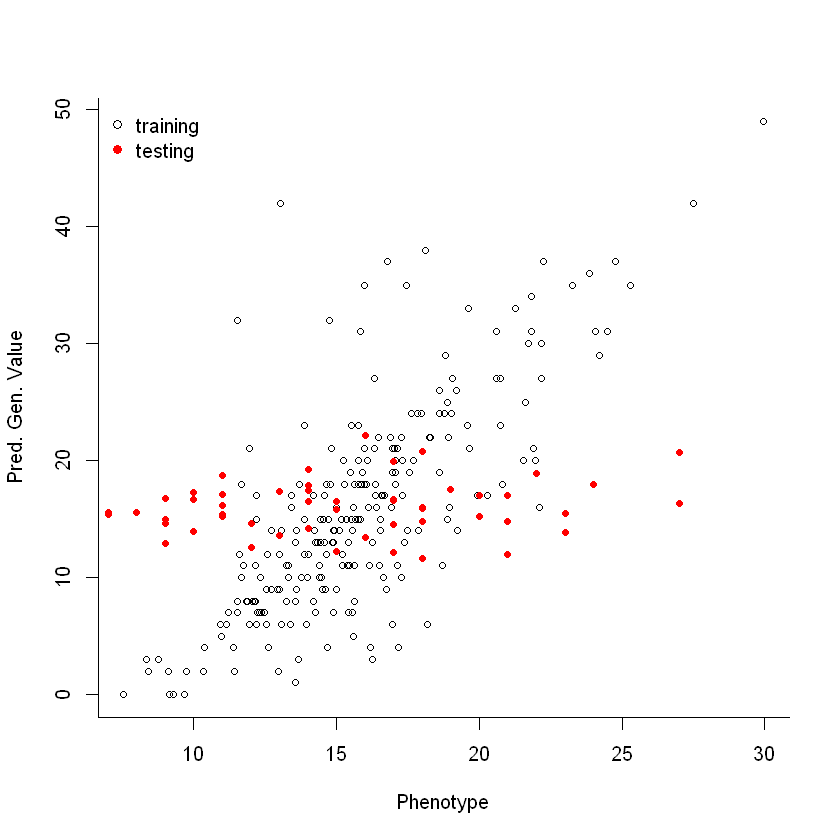

In [99]:
plot(fmBB$yHat,bcw,xlab="Phenotype", ylab="Pred. Gen. Value" ,cex=.8,bty="L")
points(x=bcw[tst],y=fmBB$yHat[tst],col=2,cex=.8,pch=19)
legend("topleft", legend=c("training","testing"),bty="n", pch=c(1,19), col=c("black","red"))

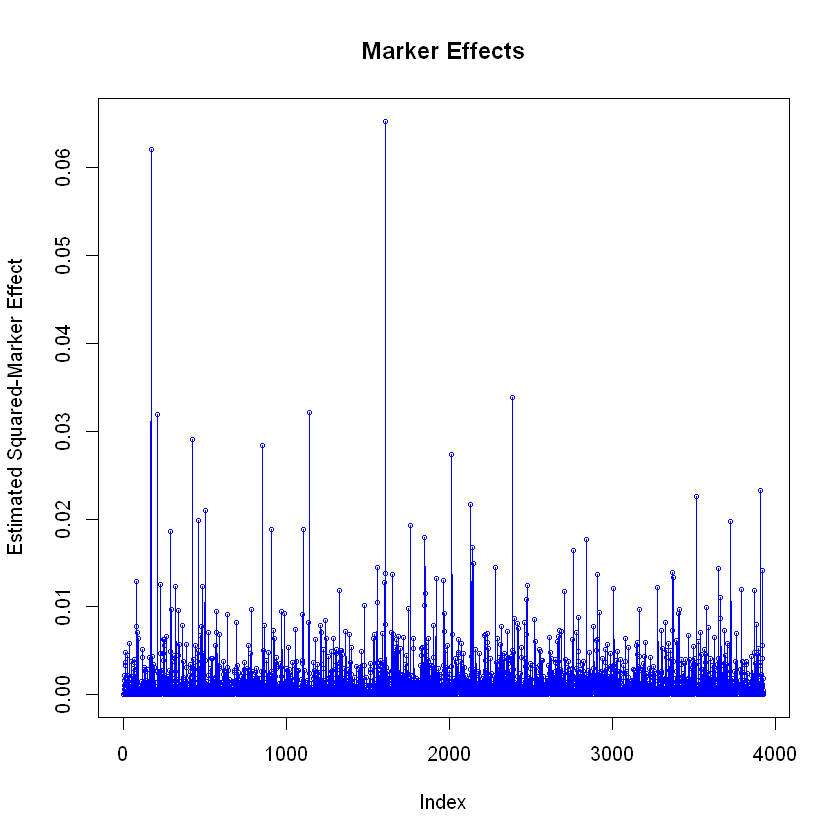

In [100]:
bhat_bb<-fmBB$ETA[[1]]$b
plot(bhat_bb^2, ylab='Estimated Squared-Marker Effect', type='o',cex=.5,col=4,main='Marker Effects')

In [101]:
max(fmBB$ETA[[1]]$b)
tail(sort(fmBB$ETA[[1]]$b),20)

[1] 0.2555698

Chr_13.594288.594550.126_C  Chr_12.7425003.7425264.128_C 
                    0.1009581                     0.1022508 
    Chr_3.200830.201104.187_A  Chr_15.4099026.4099299.102_C 
                    0.1093042                     0.1109611 
  Chr_5.2645966.2646239.143_T    Chr_5.2645966.2646239.90_T 
                    0.1115244                     0.1119336 
 Chr_17.9850755.9851026.151_G   Chr_6.9204717.9204982.130_A 
                    0.1169161                     0.1172092 
  Chr_4.8476348.8476615.129_A Chr_2.10582999.10583267.177_G 
                    0.1173636                     0.1196556 
 Chr_11.9568557.9568831.139_A  Chr_11.9568557.9568831.137_C 
                    0.1201342                     0.1224217 
  Chr_9.5609745.5610019.137_A Chr_1.18620352.18620626.132_G 
                    0.1293287                     0.1388189 
    Chr_6.184616.184889.182_G  Chr_18.2644511.2644785.135_T 
                    0.1403046                     0.1655455 
  Chr_9.8804614.8804853.113_A   Chr_6.6888743.6889017.120_T 
                    0.1684551                     0.1791537 
   Chr_11.117335.117583.141_G   Chr_4.8994711.8994979.129_C 
                    0.1840069                     0.2555698

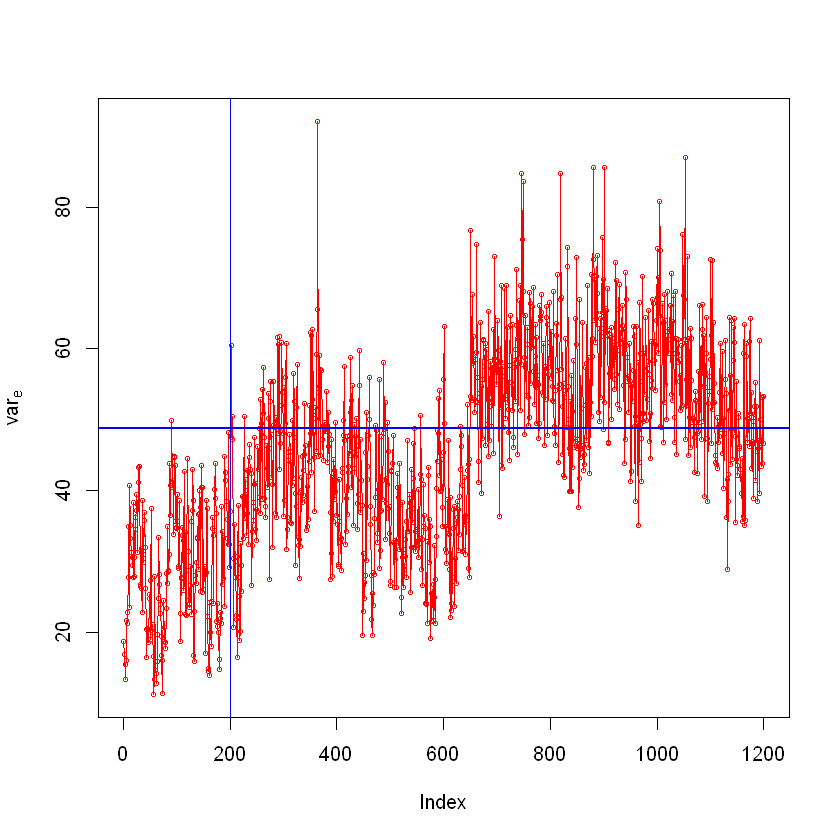

In [102]:
varE<-scan('BB_varE.dat')
plot(varE,type='o',col=2,cex=.5,ylab=expression(var[e])); 
abline(h=fmBB$varE,col=4,lwd=2); abline(v=fmBB$burnIn/fmBB$thin,col=4)